In [1]:
%time

Wall time: 0 ns


In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# 1. Introduction to date and time

In [2]:
#1.1 Importing time series data
grp = pd.read_csv('grp_stock_.csv', index_col='Date', parse_dates=['Date'])
grp.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


In [3]:
grp.shape

(251, 5)

In [22]:
#grp['Date']

# 1.2 Cleaning and preparing time series data

In [3]:
grp.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# 1.3 Visualizing the datasets

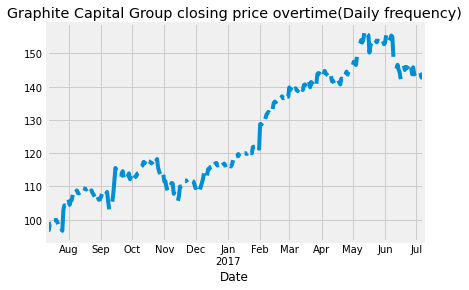

In [7]:
# # asfreq method is used to convert a time series to a specified frequency. Here it is Daily frequency.
grp['Close'].asfreq('D').plot()
plt.title('Graphite Capital Group closing price overtime(Daily frequency)')
plt.show()

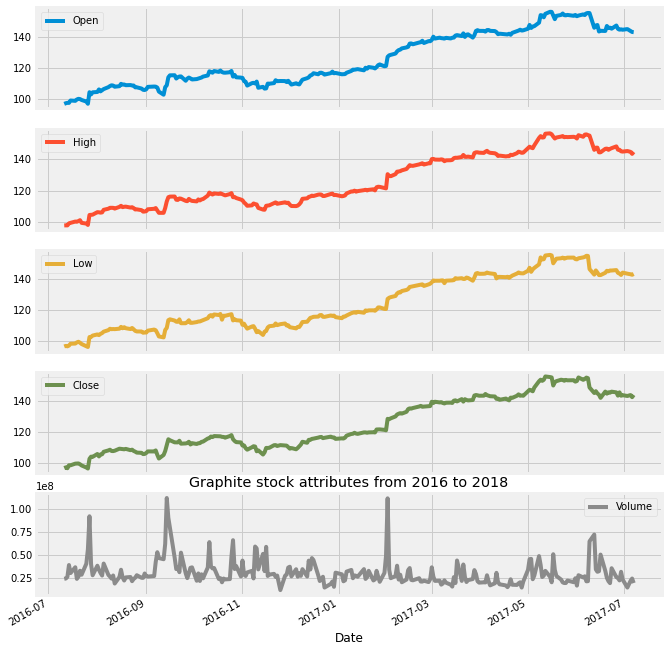

In [17]:
grp['2015':'2018'].plot(subplots = True,figsize = (10,12))
plt.title('Graphite stock attributes from 2016 to 2018')
plt.savefig('stocks.png')
plt.show()

In [ ]:
# grp['2016':'20118'].plot(subplots=True, figsize=(10,12))
# plt.title('Google stock attributes from 2008 to 2010')
# plt.savefig('stocks.png')
# plt.show()

#visualize the stock's daily closing price

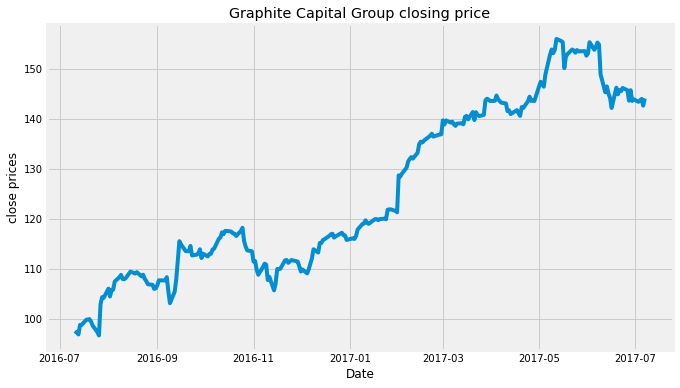

In [5]:
#plot close price
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('close prices')
plt.plot(grp['Close'])
plt.title('Graphite Capital Group closing price')
plt.show()

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

<AxesSubplot:ylabel='Density'>

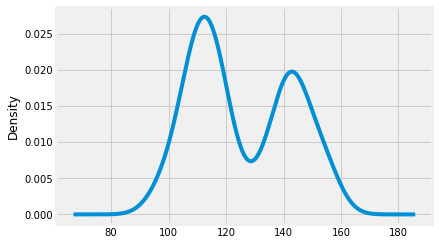

In [6]:
#we can also use  a probability distributions to visualize
df_close = grp['Close']
df_close.plot(kind='kde')

# 1.7 Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

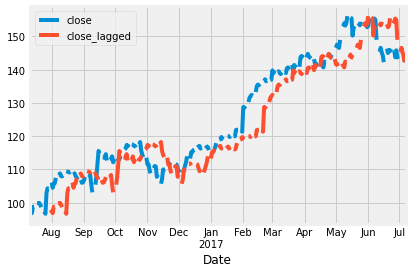

In [21]:
grp['Close'].asfreq('D').plot(legend = True)
shifted = grp['Close'].asfreq('D').shift(20).plot(legend = True)
shifted.legend(['close','close_lagged'])
plt.show()

# 1.8 Resampling
Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [27]:
grp.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171
2016-07-12,97.17,97.70,97.12,97.42,24167463
2016-07-11,96.75,97.65,96.73,96.98,23794945


In [30]:
# # Let's use pressure data to demonstrate this
# graphite1 = pd.read_csv('grp_stock_.csv', index_col='datetime', parse_dates=['datetime'])
# graphite1.tail()

In [31]:
# Let's use graphite data to demonstrate this
graphite = grp.copy()
graphite = graphite.iloc[1:]
graphite = graphite.fillna(method = 'ffill')
graphite.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-15,98.92,99.30,98.50,98.78,30136990
2016-07-14,97.39,98.99,97.32,98.79,38918997
2016-07-13,97.41,97.67,96.84,96.87,25892171
2016-07-12,97.17,97.70,97.12,97.42,24167463
2016-07-11,96.75,97.65,96.73,96.98,23794945


In [32]:
graphite.shape

(250, 5)

In [33]:
graphite = graphite.fillna('bfill')
graphite.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107
2017-06-29,144.71,145.13,142.28,143.68,31499368


In [34]:
graphite.shape

(250, 5)

In [36]:
# Shape before resampling(downsampling)
graphite.shape

(250, 5)

In [41]:
# We downsample from hourly to 3 day frequency aggregated using mean
graphite = graphite.resample('3D').mean()
graphite.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,97.110000,97.673333,96.896667,97.090,2.461819e+07
2016-07-14,98.155000,99.145000,97.910000,98.785,3.452799e+07
2016-07-17,99.130000,100.065000,98.970000,99.850,3.013690e+07
2016-07-20,99.696667,100.253333,99.060000,99.350,2.909722e+07
2016-07-23,98.250000,98.840000,96.920000,97.340,4.038292e+07


In [42]:
# Shape after resampling(downsampling)
graphite.shape

(121, 5)

Much less rows are left. Now, we will upsample from 3 day frequency to daily frequency

In [39]:
# graphite = graphite.resample('D').mean()
# graphite

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,97.110,97.673333,96.896667,97.090,24618193.0
2016-07-12,NaN,NaN,NaN,NaN,NaN
2016-07-13,NaN,NaN,NaN,NaN,NaN
2016-07-14,98.155,99.145000,97.910000,98.785,34527993.5
2016-07-15,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-02,NaN,NaN,NaN,NaN,NaN
2017-07-03,144.285,145.045000,142.910000,143.795,17923702.5
2017-07-04,NaN,NaN,NaN,NaN,NaN


In [43]:
graphite = graphite.resample('D').pad()
graphite.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-07-11,97.110,97.673333,96.896667,97.090,24618193.0
2016-07-12,97.110,97.673333,96.896667,97.090,24618193.0
2016-07-13,97.110,97.673333,96.896667,97.090,24618193.0
2016-07-14,98.155,99.145000,97.910000,98.785,34527993.5
2016-07-15,98.155,99.145000,97.910000,98.785,34527993.5


In [44]:
# Shape after resampling(upsampling)
graphite.shape

(361, 5)

Again an increase in number of rows. Resampling is cool when used properly.

# 2. Finance and statistics

# 2.1 Percent change

<AxesSubplot:xlabel='Date'>

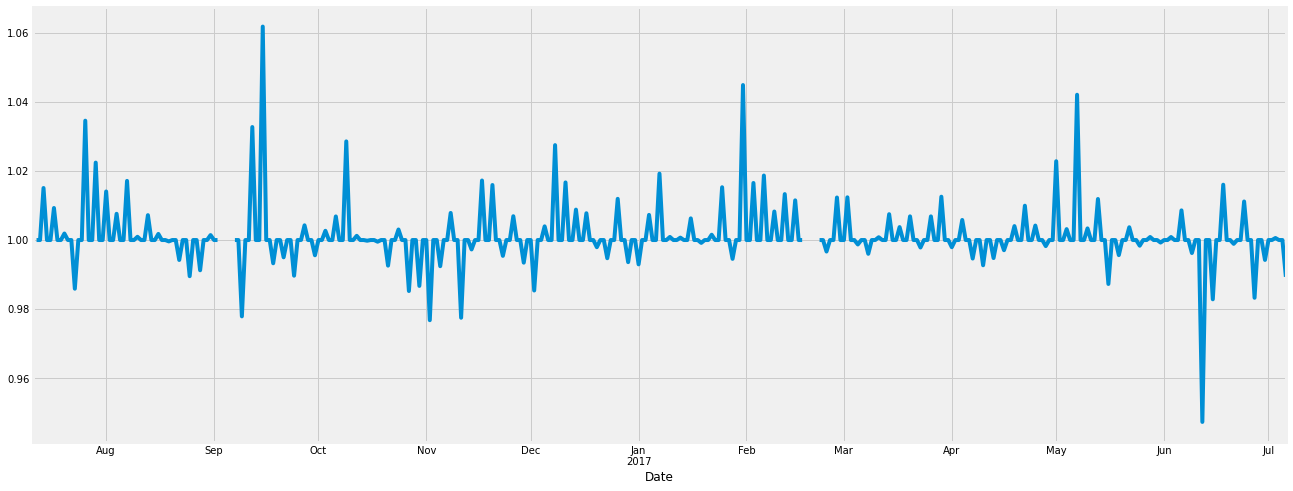

In [45]:
graphite['change'] = graphite.High.div(graphite.High.shift())
graphite['change'].plot(figsize=(20,8))

# 2.2 Stock returns

<AxesSubplot:xlabel='Date'>

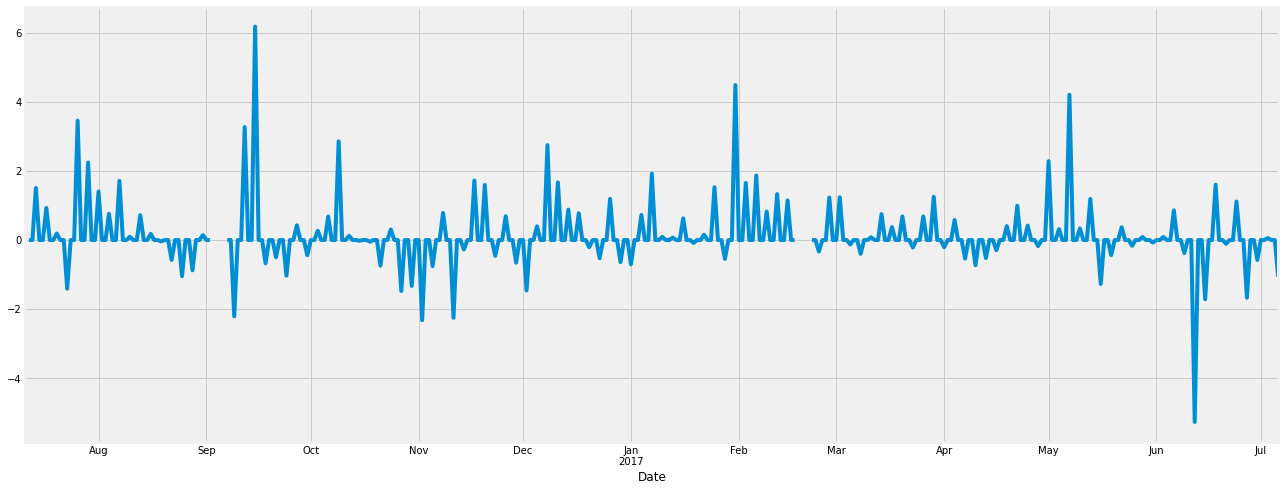

In [46]:
graphite['Return'] = graphite.change.sub(1).mul(100)
graphite['Return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

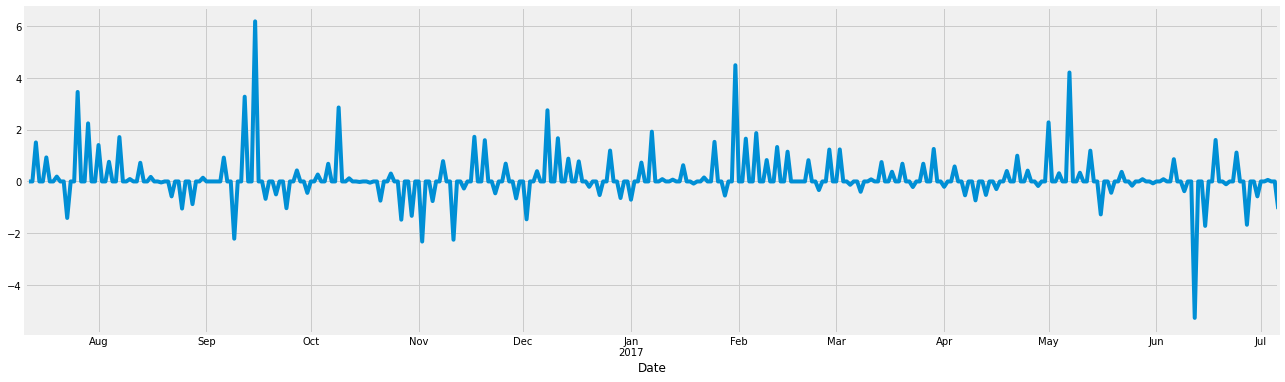

In [47]:
graphite.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

# 2.3 Absolute change in successive rows


<AxesSubplot:xlabel='Date'>

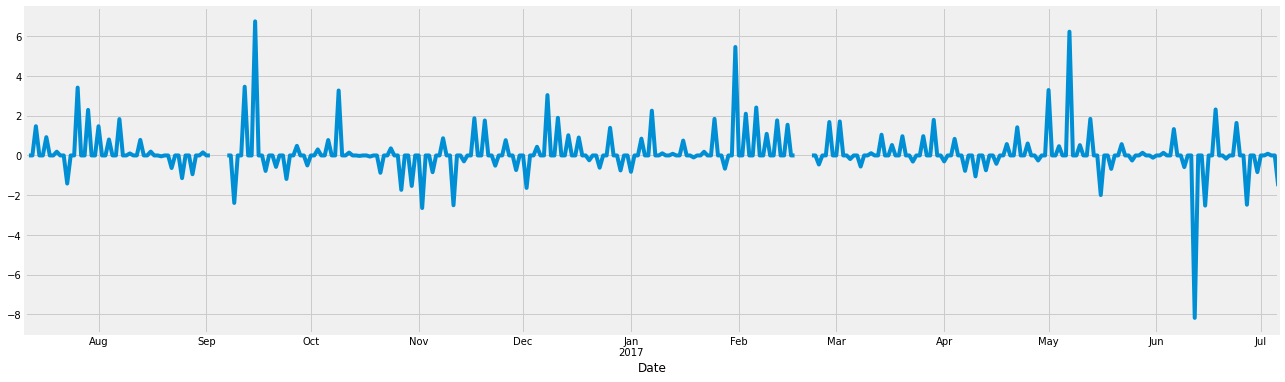

In [48]:
graphite.High.diff().plot(figsize=(20,6))

# 2.4 Comaring two or more time series

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared

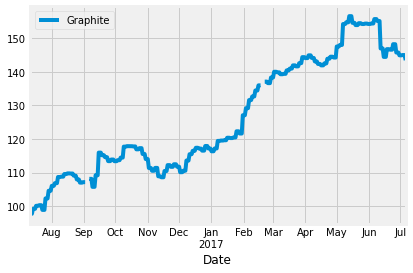

In [49]:
# Plotting before normalization
graphite.High.plot()
plt.legend(['Graphite'])
plt.show()

In [50]:
graphite.High.iloc[0]

97.67333333333333

In [51]:
graphite.High.iloc[1]

97.67333333333333

In [55]:
graphite.High.iloc[10]

100.25333333333333

In [56]:
graphite.High.iloc[1]/graphite.High.iloc[0]

1.0

In [57]:
graphite.High.iloc[10]/graphite.High.iloc[1]

1.0264145792096102

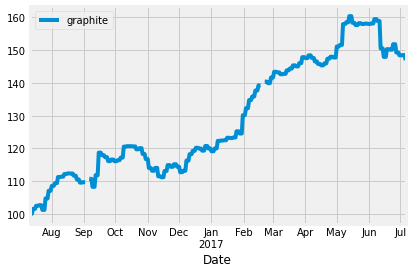

In [69]:
# Normalizing and comparison
# Both stocks start from 100
normalized_graphite = graphite.High.div(graphite.High.iloc[1]).mul(100)
normalized_graphite.plot()
plt.legend(['graphite'])
plt.show()

# 2.5 Window functions

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

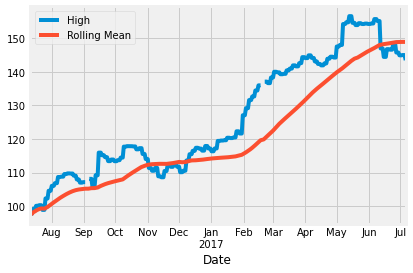

In [71]:
# Rolling window functions
rolling_graphite = graphite.High.rolling('90D').mean()
graphite.High.plot()
rolling_graphite.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

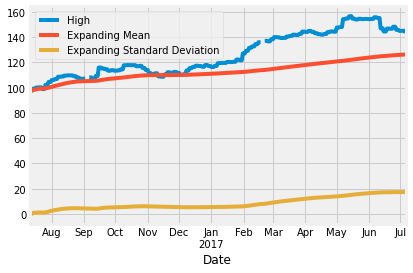

In [73]:
# Expanding window functions
graphite_mean = graphite.High.expanding().mean()
graphite_std = graphite.High.expanding().std()
graphite.High.plot()
graphite_mean.plot()
graphite_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

# 2.6 OHLC charts

In [76]:
# OHLC chart of June 2008
trace = go.Ohlc(x=graphite['6-2017'].index,
                open=graphite['06-2017'].Open,
                high=graphite['06-2017'].High,
                low=graphite['06-2017'].Low,
                close=graphite['06-2017'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [78]:
# OHLC chart of 2008
trace = go.Ohlc(x=graphite['2017'].index,
                open=graphite['2017'].Open,
                high=graphite['2017'].High,
                low=graphite['2017'].Low,
                close=graphite['2017'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [79]:
# OHLC chart of 2008
trace = go.Ohlc(x=graphite.index,
                open=graphite.Open,
                high=graphite.High,
                low=graphite.Low,
                close=graphite.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

# 2.7 Candlestick charts

In [80]:
#Candlestick chart of march 2017
trace = go.Candlestick(x=graphite['03-2017'].index,
                open=graphite['03-2017'].Open,
                high=graphite['03-2017'].High,
                low=graphite['03-2017'].Low,
                close=graphite['03-2017'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [81]:
# Candlestick chart of 2017
trace = go.Candlestick(x=graphite['2017'].index,
                open=graphite['2017'].Open,
                high=graphite['2017'].High,
                low=graphite['2017'].Low,
                close=graphite['2017'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

In [82]:
# Candlestick chart of graphite
trace = go.Candlestick(x=graphite.index,
                open=graphite.Open,
                high=graphite.High,
                low=graphite.Low,
                close=graphite.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

# 2.8 Autocorrelation and Partial Autocorrelation

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

# Autocorrelation

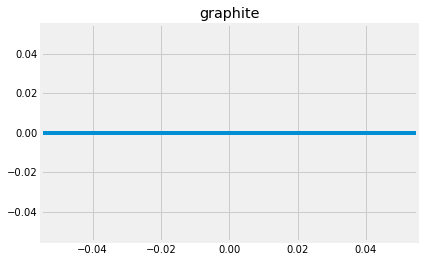

In [84]:
# Autocorrelation of humidity of San Diego
plot_acf(graphite["High"],lags=25,title="graphite")
plt.show()

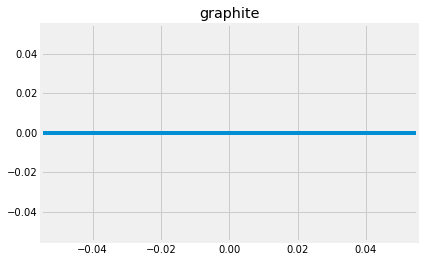

In [86]:
plot_acf(graphite["Close"],lags=25,title="graphite")
plt.show()

In [ ]:
#As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

# Partial Autocorrelation

In [ ]:
#Though it is statistically signficant, partial autocorrelation after first 2 lags is very low

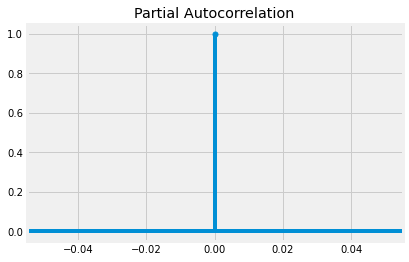

In [85]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(graphite["Close"],lags=25)
plt.show()

# 3. Time series decomposition and Random walks
3.1. Trends, seasonality and noise

These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values


<AxesSubplot:xlabel='Date'>

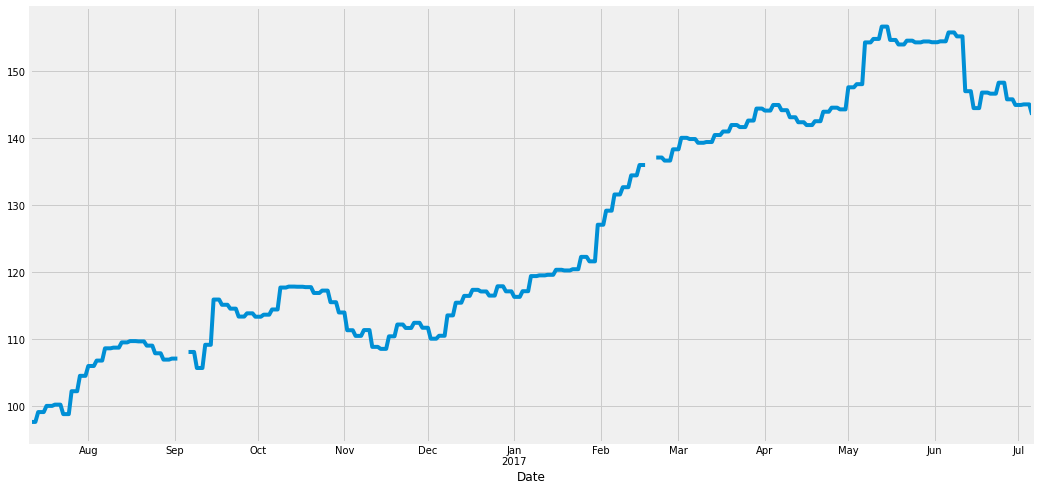

In [87]:
# Let's take graphite stocks High for this
graphite["High"].plot(figsize=(16,8))

In [90]:
graphite.isnull().sum()

Open      6
High      6
Low       6
Close     6
Volume    6
change    9
Return    9
dtype: int64

In [93]:
graphite = graphite.fillna('bfill')

In [97]:
graphite = graphite.dropna

In [114]:
graphite['High']

TypeError: 'method' object is not subscriptable

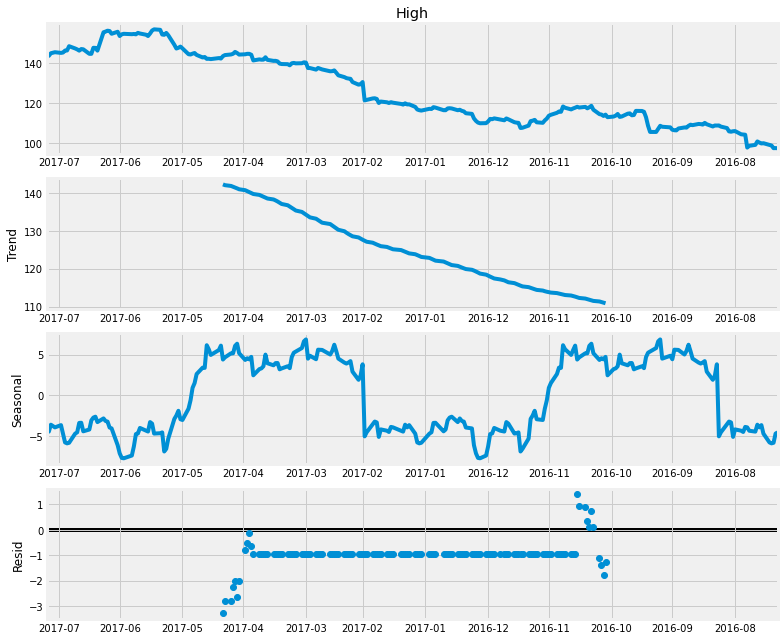

In [123]:
rcParams['figure.figsize'] = 11, 9
decomposed_graphite_volume = sm.tsa.seasonal_decompose(grp.High,freq=120) # The frequncy is annual
figure = decomposed_graphite_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values


## <a id='3.2'>3.2. White noise</a>
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

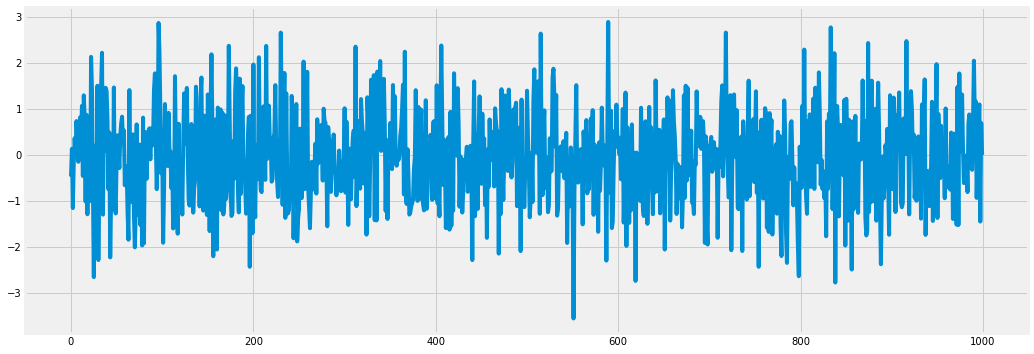

In [100]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

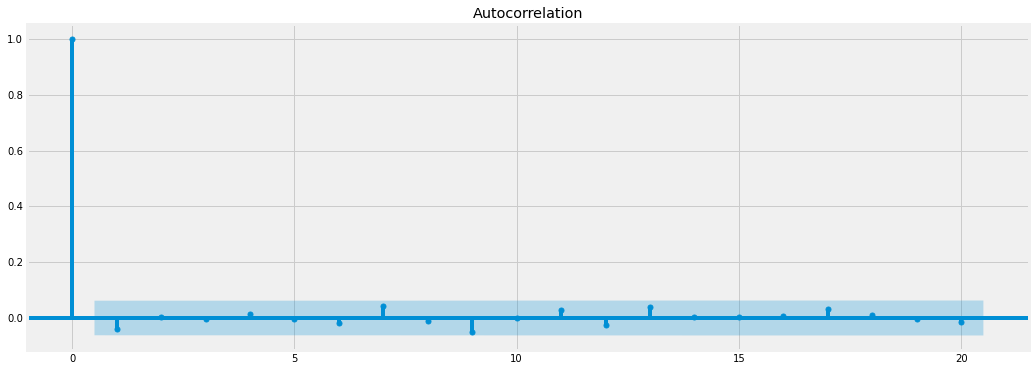

In [101]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

In [ ]:
#See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

# 3.3. Random Walk
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

Pt = Pt-1 + εt
Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)

Pt - Pt-1 = μ + εt

Regression test for random walk #### Pt = α + βPt-1 + εt #### Equivalent to Pt - Pt-1 = α + βPt-1 + εt
Test: #### H0: β = 1 (This is a random walk) #### H1: β < 1 (This is not a random walk)
Dickey-Fuller Test: #### H0: β = 0 (This is a random walk) #### H1: β < 0 (This is not a random walk)

# Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [126]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 
adf = adfuller(grp.Volume)
print("p-value of graphite: {}".format(float(adf[1])))
# adf = adfuller(graphite["Volume"])
# print("p-value of graphite: {}".format(float(adf[1])))

p-value of graphite: 4.6966193203472987e-14


 p-value 0.0004696625 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
 #p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a random walk.

# Generating a random walk¶

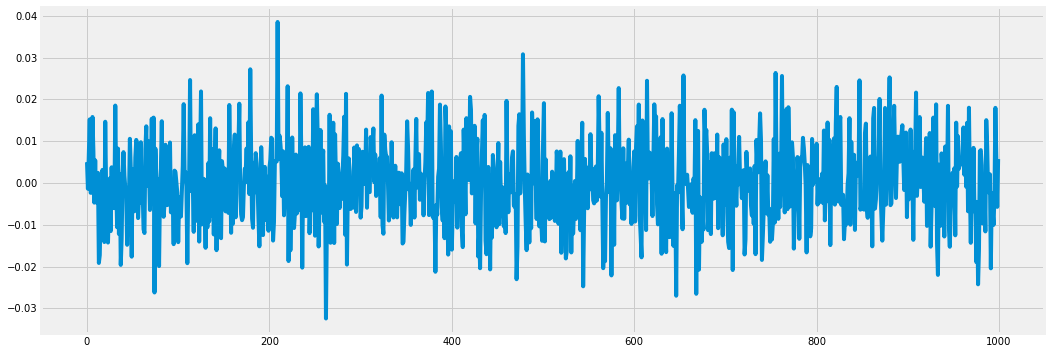

In [104]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [127]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

# 3.4 Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

<AxesSubplot:xlabel='Date'>

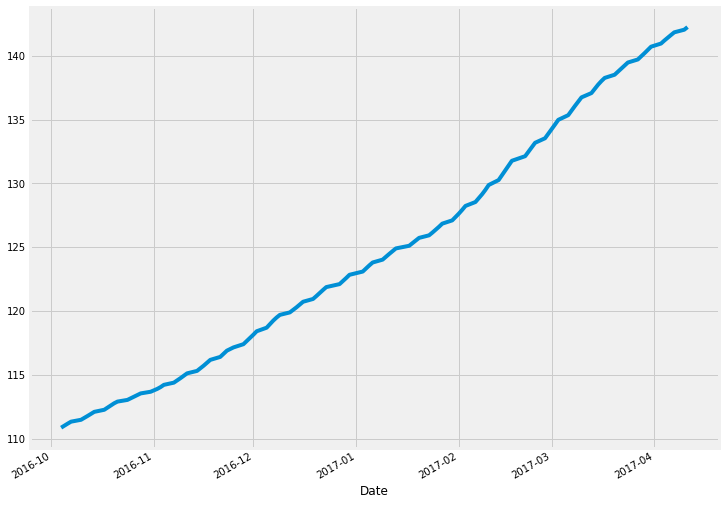

In [128]:
# The original non-stationary plot
decomposed_graphite_volume.trend.plot()

<AxesSubplot:xlabel='Date'>

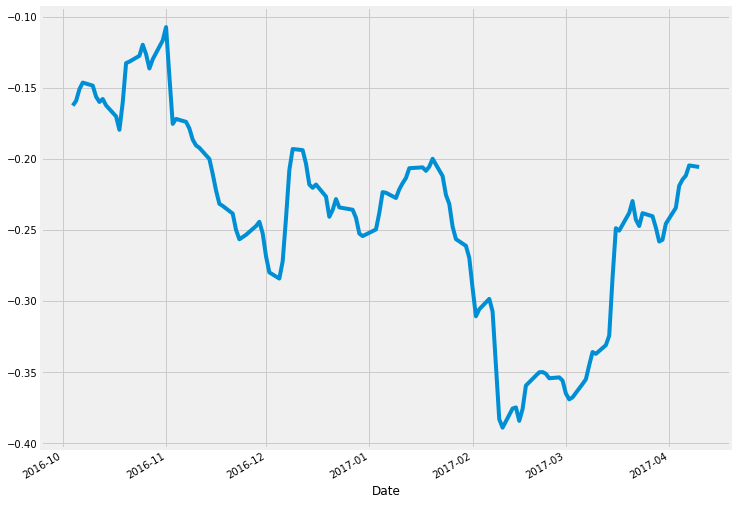

In [129]:
# The new stationary plot
decomposed_graphite_volume.trend.diff().plot()

# 4. Modelling using statstools

4.1 AR models
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

AR(1) model
Rt = μ + ϕRt-1 + εt

As RHS has only one lagged value(Rt-1)this is called AR model of order 1 where μ is mean and ε is noise at time t
If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

AR(2) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

AR(3) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt



# Simulating AR(1) model

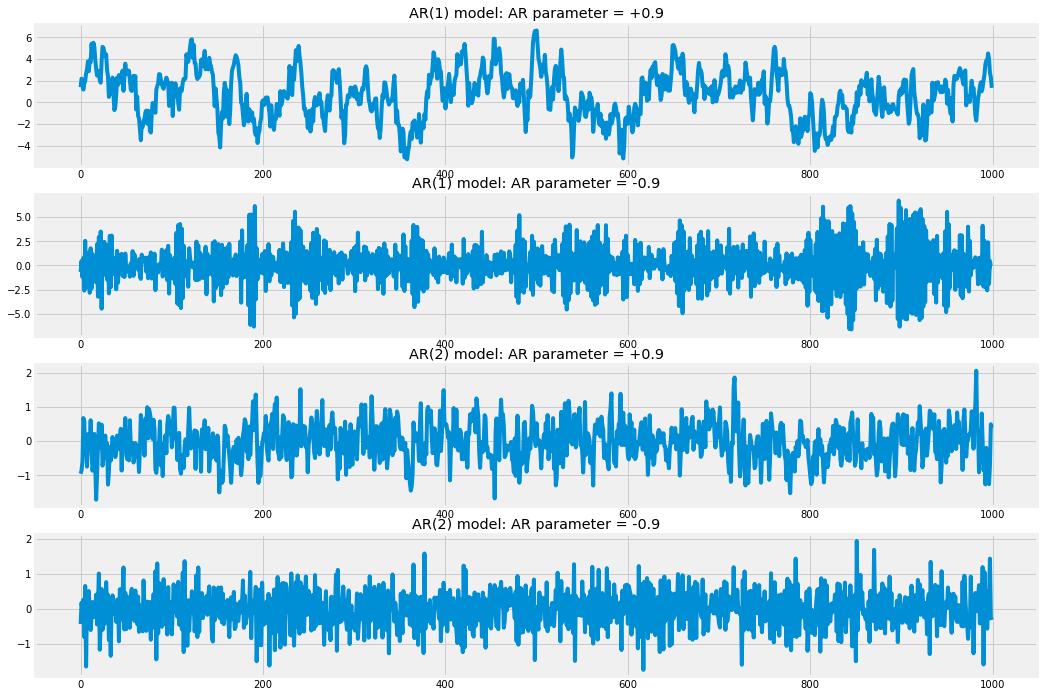

In [131]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [132]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Sun, 03 Apr 2022   AIC                           2837.403
Time:                        21:42:23   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

# Predicting the models

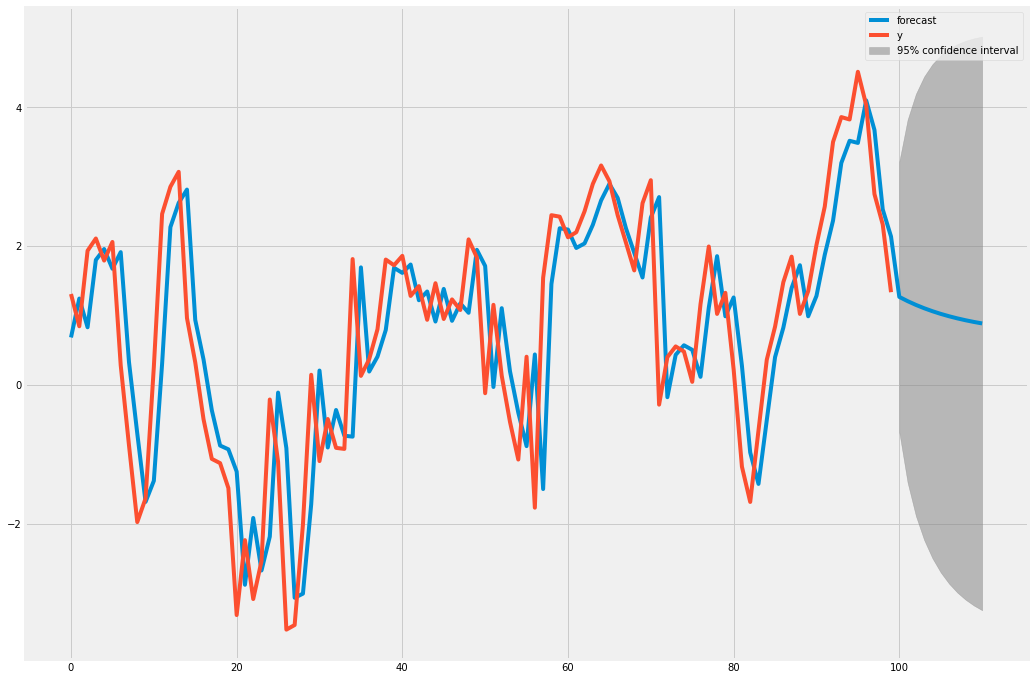

In [134]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

In [135]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054529135027.


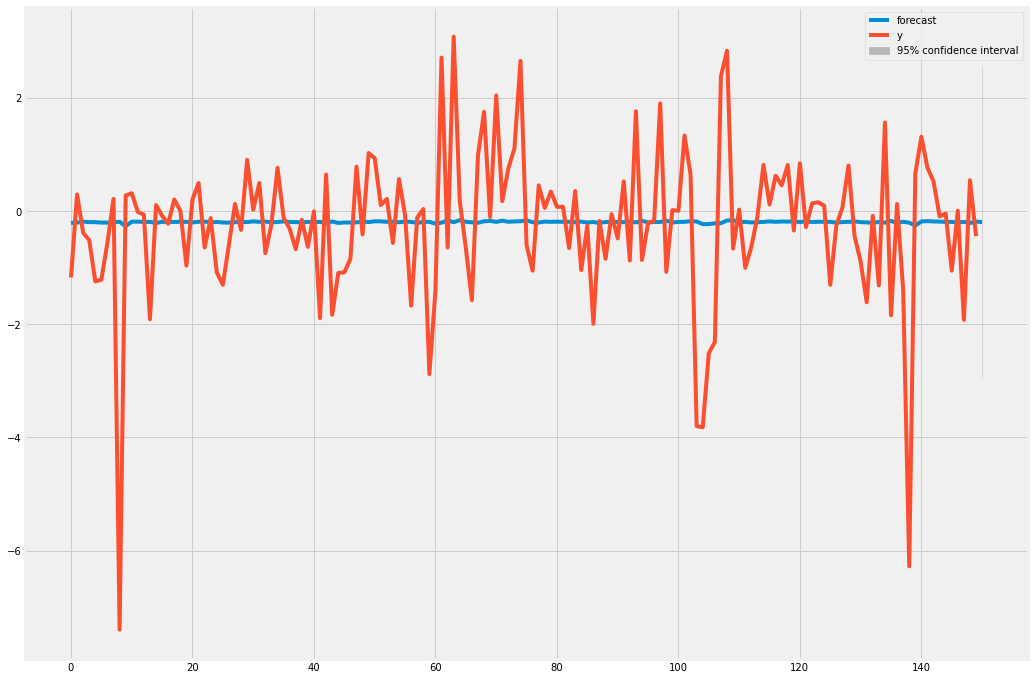

In [144]:
# Predicting closing prices of google
humid = ARMA(grp["Close"].diff().iloc[1:].values, order=(0,1))
res = humid.fit()
res.plot_predict(start=100, end=250)
plt.show()

# 4.2 MA models
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

MA(1) model
Rt = μ + ϵt1 + θϵt-1

It translates to Today's returns = mean + today's noise + yesterday's noise

As there is only 1 lagged value in RHS, it is an MA model of order 1

# Simulating MA(1) model

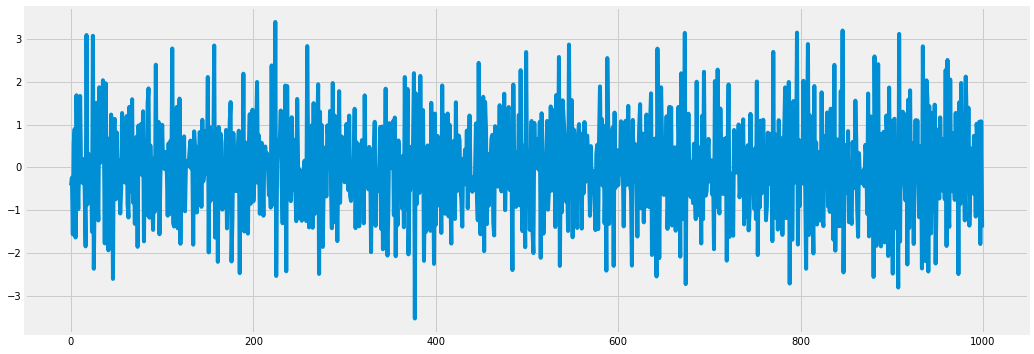

In [145]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

# Forecasting the simulated MA model

In [146]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Sun, 03 Apr 2022   AIC                           2852.553
Time:                        22:05:11   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

# Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(0, 3)   Log Likelihood                -439.304
Method:                       css-mle   S.D. of innovations              1.402
Date:                Sun, 03 Apr 2022   AIC                            888.608
Time:                        22:06:24   BIC                            906.215
Sample:                             0   HQIC                           895.694
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1885      0.085     -2.214      0.027      -0.355      -0.022
ma.L1.y        0.0233      0.063      0.368      0.713      -0.101       0.147
ma.L2.y        0.0232      0.059      0.392      0.6

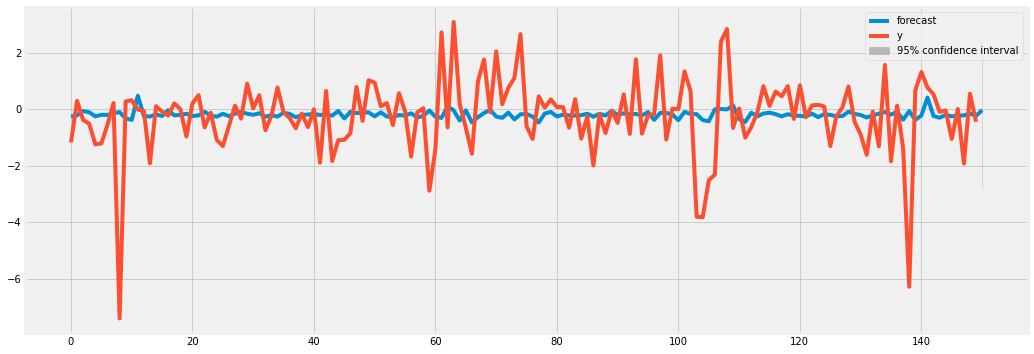

In [147]:
# Forecasting and predicting montreal humidity
model = ARMA(grp["Close"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=100, end=250)
plt.show()

In [163]:
rmse = math.sqrt(mean_squared_error(grp["Close"].diff().iloc[100:152].values, result.predict(start=200,end=251)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.283368299157295.


In [ ]:
# Let's use pressure data to demonstrate this
pressure = pd.read_csv('pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure.tail()

In [ ]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.tail()

In [ ]:
#test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #plot rolling sta

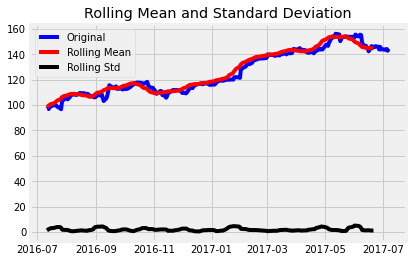

Results of dickey fuller test
Test Statistics                 -0.039521
p-value                          0.955139
No. of lags used                 0.000000
Number of observations used    250.000000
critical value (1%)             -3.456781
critical value (5%)             -2.873172
critical value (10%)            -2.572969
dtype: float64


In [7]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)


<Figure size 432x288 with 0 Axes>

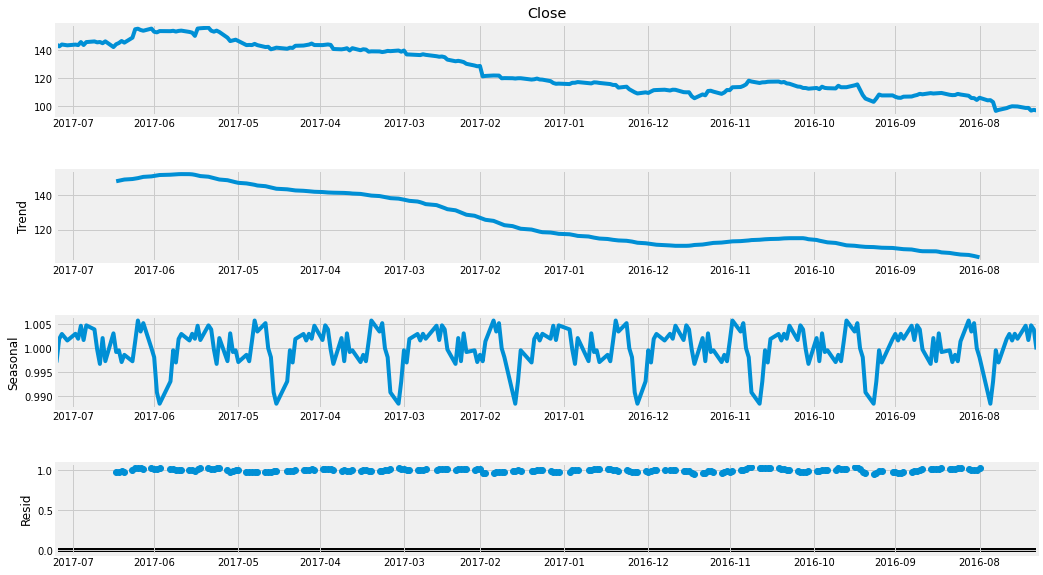

In [9]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


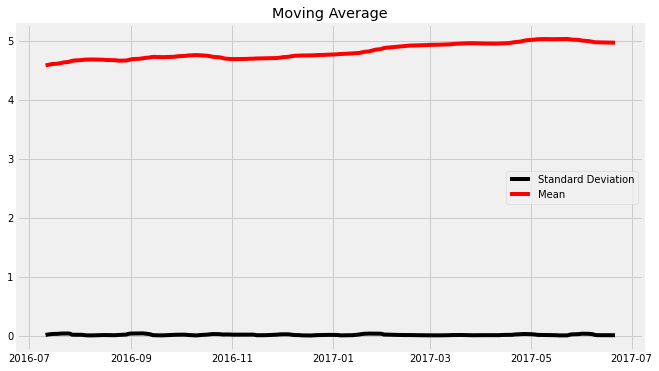

In [10]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

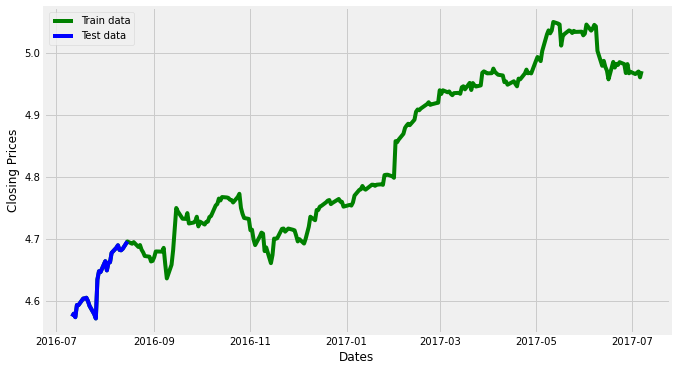

In [11]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [14]:
!pip install pmdarima

In [15]:
from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1365.724, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1364.183, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1364.154, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1364.940, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1361.904, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.486 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 684.862
Date:                Thu, 31 Mar 2022   AIC                          -1365.724
Time:                        23:04:22   BIC                          -1358.927
Sample:                             0   HQIC                         -1362.979
                                - 222                                  

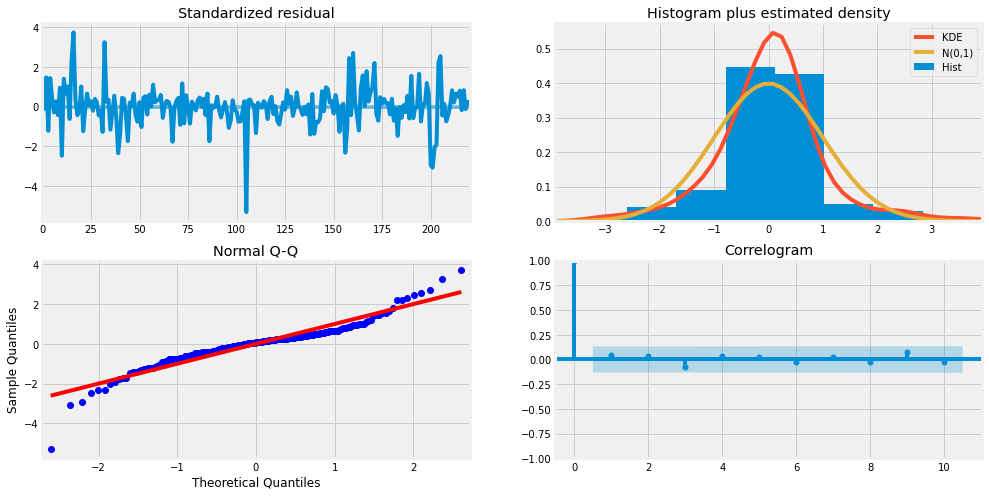

In [16]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [23]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,0,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  222
Model:                     ARMA(1, 0)   Log Likelihood                 684.255
Method:                       css-mle   S.D. of innovations              0.011
Date:                Thu, 31 Mar 2022   AIC                          -1362.511
Time:                        23:06:39   BIC                          -1352.303
Sample:                             0   HQIC                         -1358.389
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8341      0.112     43.220      0.000       4.615       5.053
ar.L1.Close     0.9965      0.004    263.636      0.000       0.989       1.004
                                    Roots       

C:\Users\GaliveetiPra_pv4g\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\GaliveetiPra_pv4g\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



In [33]:
# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% conf

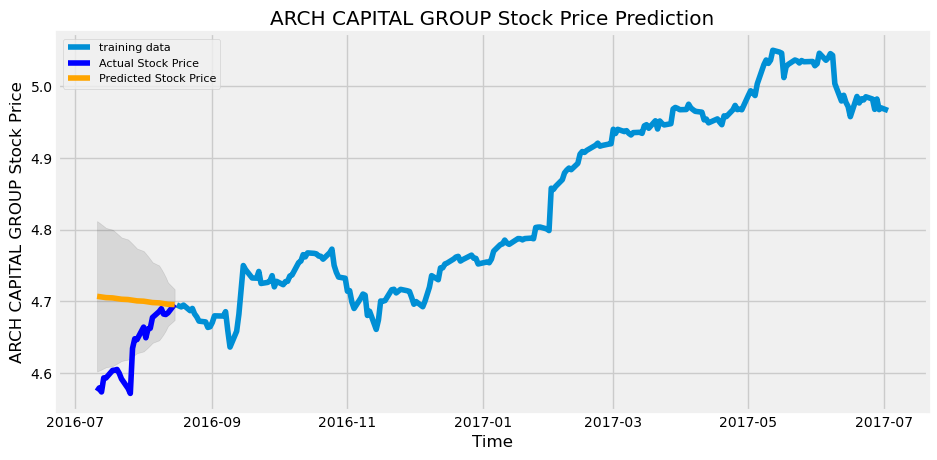

In [34]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.006942163749660182
MAE: 0.0694519726046522
RMSE: 0.08331964804090439
MAPE: 0.015087835280508268


In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


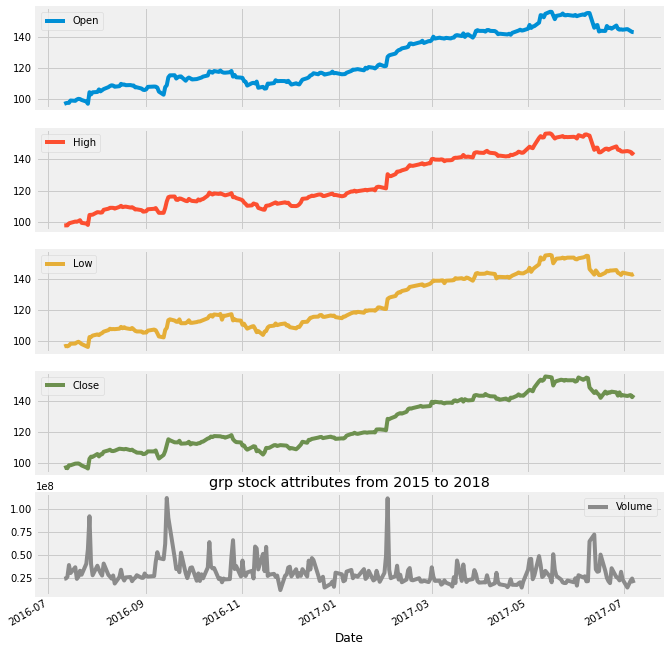

In [28]:
grp['2015':'2018'].plot(subplots=True, figsize=(10,12))
plt.title('grp stock attributes from 2015 to 2018')
plt.savefig('stocks.png')
plt.show()

1.4 Timestamps and Periods

In [29]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [30]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [31]:
period.start_time

Timestamp('2017-01-01 00:00:00')

In [32]:
period.end_time

Timestamp('2017-01-01 23:59:59.999999999')

In [33]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [34]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [35]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

In [36]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [49]:
#grp['Open ']

In [50]:
# grp[" Open"].asfreq('M').plot(legend=True)
# shifted = grp[" open "].asfreq('M').shift(10).plot(legend=True)
# shifted.legend(['Open','open_lagged'])
# plt.show()

# 2. Finance and statistics

2.1 Percent change

<AxesSubplot:xlabel='Date'>

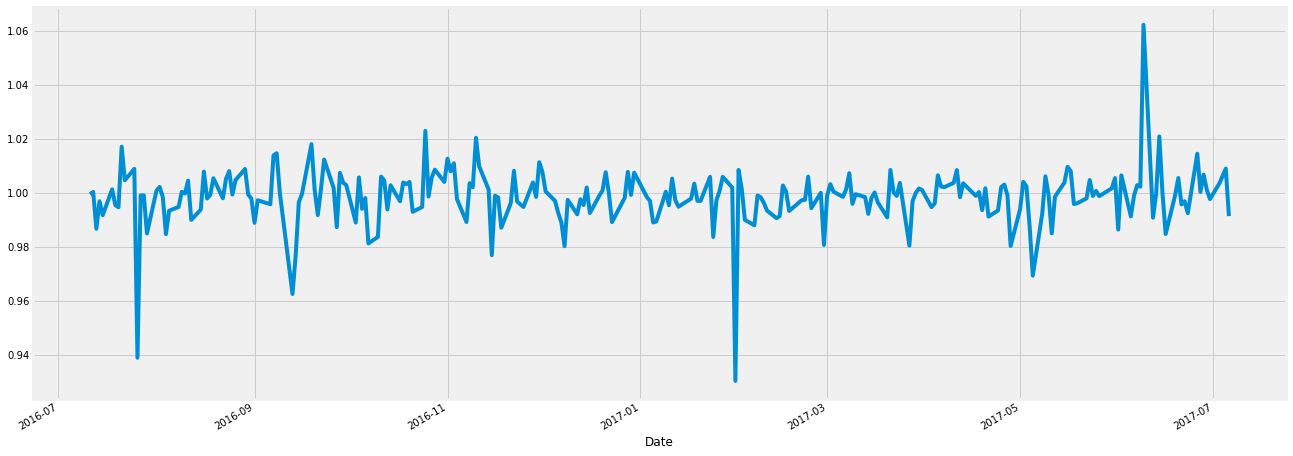

In [51]:
grp['Change'] = grp.High.div(grp.High.shift())
grp['Change'].plot(figsize=(20,8))

2.2 Stock returns

<AxesSubplot:xlabel='Date'>

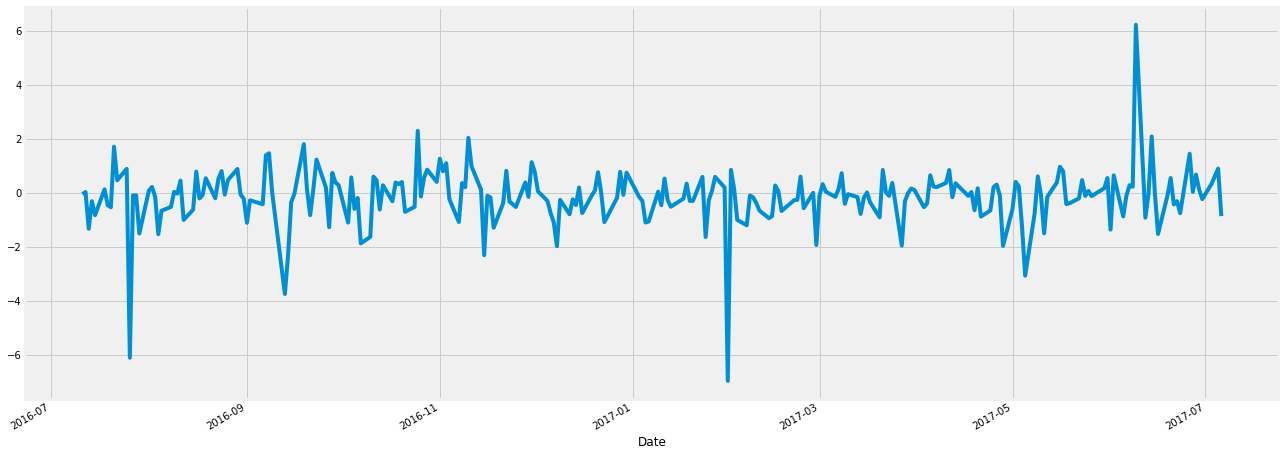

In [52]:
grp['Return'] = grp.Change.sub(1).mul(100)
grp['Return'].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

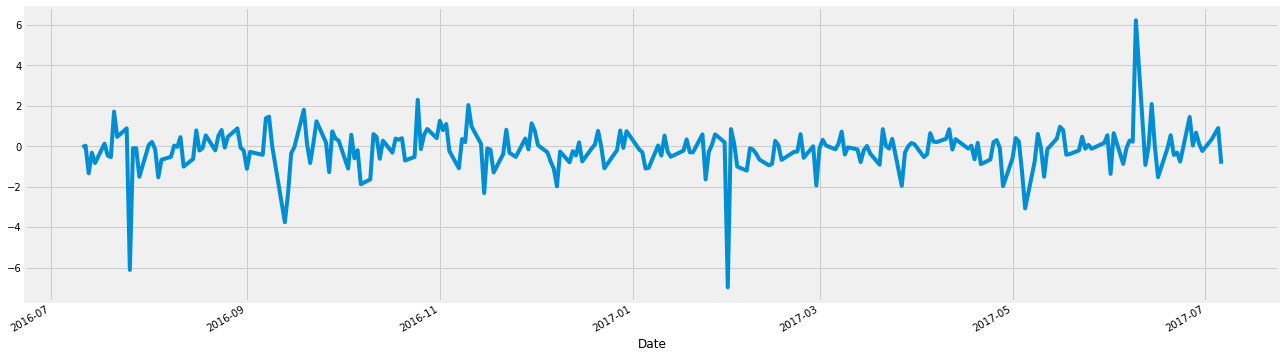

In [53]:
grp.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

# 2.3 Absolute change in successive rows

<AxesSubplot:xlabel='Date'>

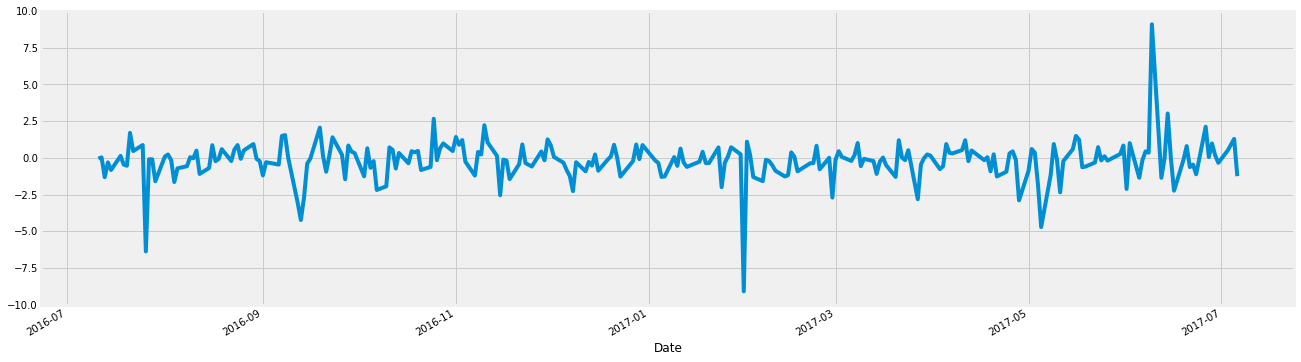

In [54]:
grp.High.diff().plot(figsize=(20,6))

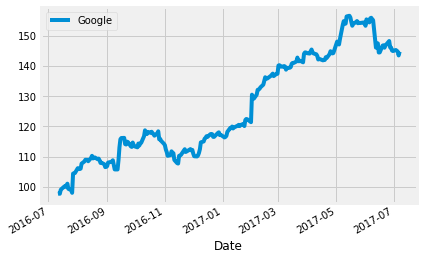

In [56]:
# Plotting before normalization
grp.High.plot()
plt.legend(['Google'])
plt.show()

In [57]:
grp.High.iloc[0]

144.75

In [58]:
grp.High.iloc[1]

143.5

In [60]:
grp.High.iloc[1]/grp.High.iloc[0]

0.9913644214162349

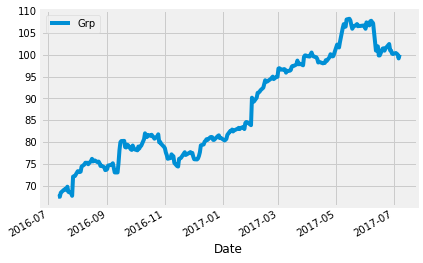

In [61]:
# Normalizing 
normalized_grp = grp.High.div(grp.High.iloc[0]).mul(100)
normalized_grp.plot()
plt.legend(['Grp'])
plt.show()

# 2.5 Window functions

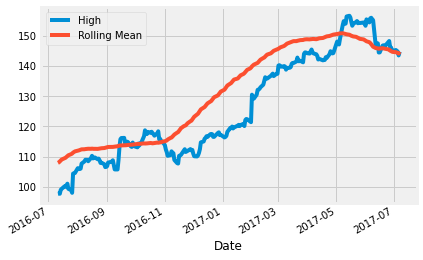

In [62]:
# Rolling window functions
rolling_grp = grp.High.rolling('90D').mean()
grp.High.plot()
rolling_grp.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

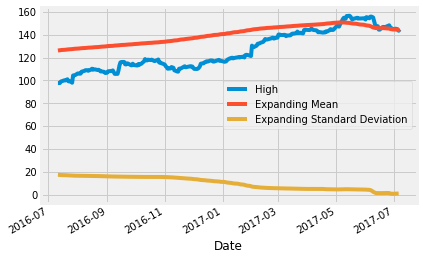

In [63]:
# Expanding window functions
grp_mean = grp.High.expanding().mean()
grp_std = grp.High.expanding().std()
grp.High.plot()
grp_mean.plot()
grp_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

# 2.6 OHLC charts

In [64]:
# OHLC chart of June 2008
trace = go.Ohlc(x=grp['06-2016'].index,
                open=grp['06-2016'].Open,
                high=grp['06-2016'].High,
                low=grp['06-2016'].Low,
                close=grp['06-2016'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [65]:
# Candlestick chart of 2006-2018
trace = go.Candlestick(x=grp.index,
                open=grp.Open,
                high=grp.High,
                low=grp.Low,
                close=grp.Close)
data = [trace]
iplot(data, filename='simple_candlestick')

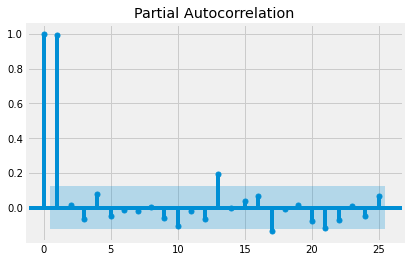

In [66]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(grp["Close"],lags=25)
plt.show()

<AxesSubplot:xlabel='Date'>

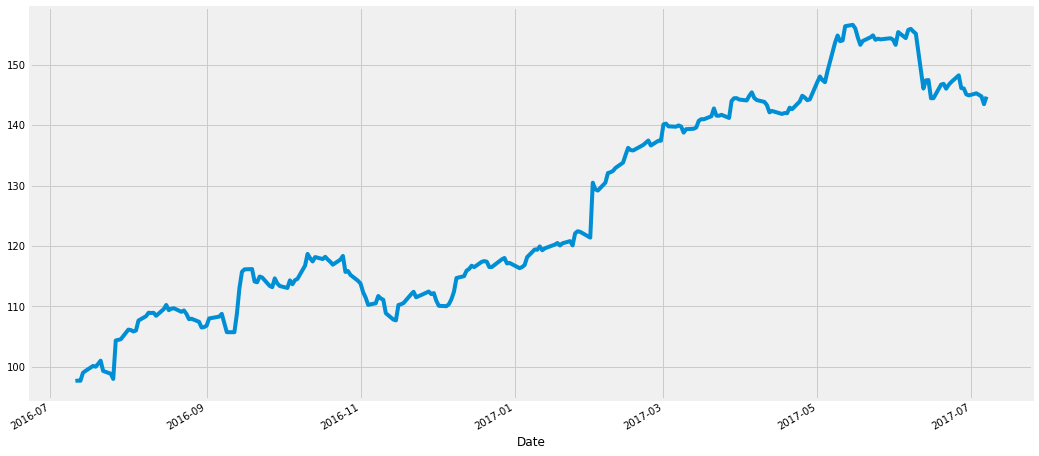

In [67]:
# Let's take Google stocks High for this
grp["High"].plot(figsize=(16,8))

In [70]:
# # Now, for decomposition...
# rcParams['figure.figsize'] = 11, 9
# decomposed_grp_volume = sm.tsa.seasonal_decompose(grp["High"],freq=180) # The frequncy is annual
# figure = decomposed_grp_volume.plot()
# plt.show()

In [71]:
adf = adfuller(grp["Volume"])
print("p-value of grp: {}".format(float(adf[1])))

p-value of grp: 4.6966193203472987e-14


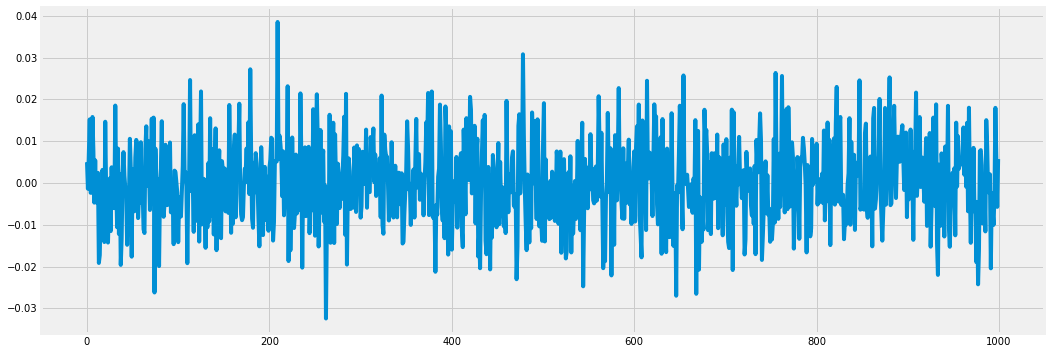

In [72]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [75]:
# The original non-stationary plot
# decomposed_grp_volume.trend.plot()

In [76]:
# The new stationary plot
# decomposed_grp_volume.trend.diff().plot()

# Simulating AR(1) model

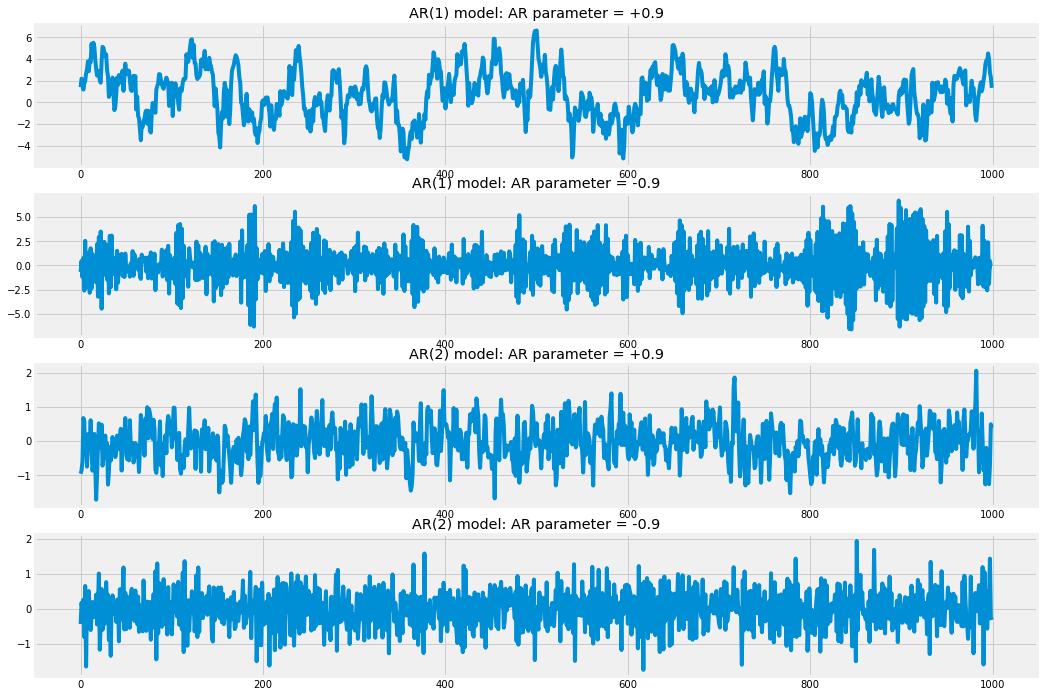

In [77]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

# Forecasting a simulated model

In [78]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Wed, 30 Mar 2022   AIC                           2837.403
Time:                        22:34:21   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

Predicting the models
# Predicting simulated AR(1) model 

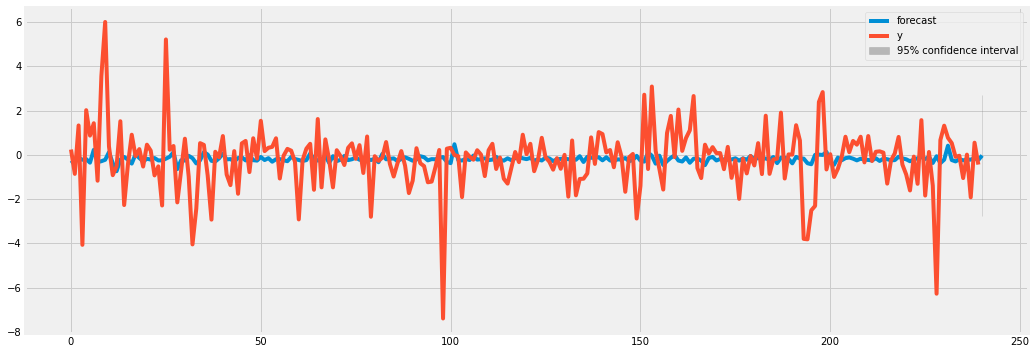

In [156]:
# Predicting simulated AR(1) model 
result.plot_predict(start=10, end=250)
plt.show()

In [80]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0408054529135027.


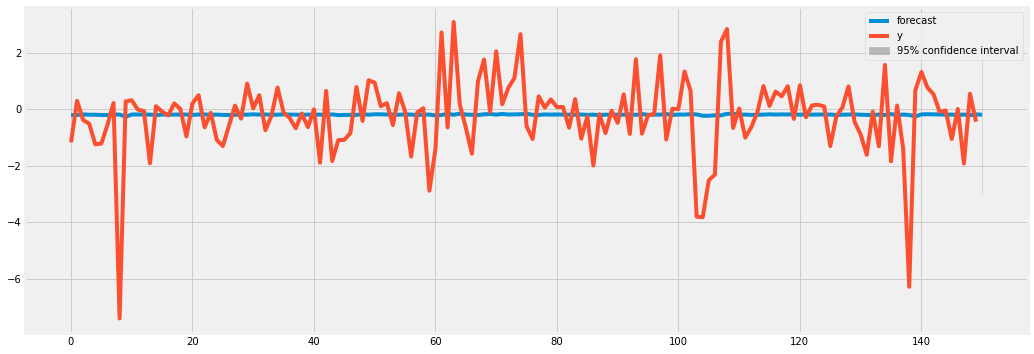

In [154]:
# Predicting closing prices of google
humid = ARMA(grp["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=100, end=250)
plt.show()